# Import and Clean Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn


df = pd.read_excel('/Users/anthonymoubarak/Desktop/Spotify Project/anthony’s_music.xlsx')

#Drop useless columns 

useless_columns = ['Artist URI' , 'Album URI' , 'Album Image URL' , 'Disc Number' , 'Track Number',
                  'Track Preview URL','Added By', 'Album Genres' , 'Label' ]


df = df.drop(columns = useless_columns)

# Add column indicating all these columns are in my playlist, something that will be later used in model building

df['In_Playlist'] = 1
df['Artist Genres'] = df['Artist Genres'].astype('str')

df['Album Release Date'] = df['Album Release Date'].astype('str')


df

,Track Name,Artist Name,Album Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Added At,Artist Genres,Danceability,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,In_Playlist
0,The Diary of Jane - Single Version,Breaking Benjamin,Phobia (Explicit Version),2006-01-01,200546,False,62,2019-12-06T08:53:19Z,"alternative metal,nu metal,post-grunge",0.392,...,-4.441,0,0.0630,0.000070,0.042700,0.1060,0.2980,167.094,4,1
1,Nothing Else Matters,Metallica,Metallica,1991-08-12,388266,False,78,2019-12-06T08:56:09Z,"hard rock,metal,old school thrash,rock,thrash ...",0.553,...,-11.218,0,0.0263,0.045800,0.000006,0.0750,0.1580,142.352,3,1
2,The Unforgiven,Metallica,Metallica,1991-08-12,386493,False,72,2019-12-06T08:56:15Z,"hard rock,metal,old school thrash,rock,thrash ...",0.540,...,-9.579,1,0.0254,0.010800,0.002960,0.2530,0.2440,139.261,4,1
3,Turn The Page,Metallica,Garage Inc.,1998-01-01,366466,False,62,2019-12-06T08:56:36Z,"hard rock,metal,old school thrash,rock,thrash ...",0.426,...,-3.963,1,0.0318,0.000019,0.022000,0.0937,0.2280,149.013,4,1
4,The Day That Never Comes,Metallica,Death Magnetic,2008-01-01,476266,False,61,2019-12-06T08:56:52Z,"hard rock,metal,old school thrash,rock,thrash ...",0.334,...,-2.293,0,0.0619,0.000091,0.149000,0.1060,0.5010,126.883,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Home Sweet Home,Mötley Crüe,Theatre of Pain,1985,240933,False,67,2021-02-07T08:25:41Z,"glam metal,hard rock,metal,rock,sleaze rock",0.403,...,-6.416,1,0.0354,0.099900,0.000003,0.1240,0.1490,76.329,4,1
523,Careless Whisper,Seether,Finding Beauty In Negative Spaces (Bonus Track...,2007-01-01,296973,False,63,2021-02-07T08:39:48Z,"alternative metal,nu metal,post-grunge,south a...",0.469,...,-4.196,1,0.1020,0.000061,0.005470,0.0717,0.3580,134.031,4,1
524,Moving On,Asking Alexandria,From Death To Destiny,2013-08-06,242593,False,56,2021-02-07T08:47:46Z,"melodic metalcore,metalcore,trancecore,uk meta...",0.446,...,-4.141,0,0.0320,0.000569,0.000000,0.1820,0.3360,134.971,4,1
525,Not The American Average,Asking Alexandria,Stand Up And Scream,2009-09-15,279226,True,61,2021-02-07T08:59:02Z,"melodic metalcore,metalcore,trancecore,uk meta...",0.236,...,-4.106,0,0.1880,0.030500,0.000000,0.2780,0.0685,184.981,4,1


In [2]:
# Data cleaning 



df['Artist Genres'] = df['Artist Genres'].astype('str')

# Keep only the year and convert it to int
for i in np.arange(len(df['Album Release Date'])):
    
    df['Album Release Date'][i] = df['Album Release Date'][i].split('-')[0]
    

df['Album Release Date'] = df['Album Release Date'].astype('int')


# Convert Explicit column to binary 

df['Explicit'] = df['Explicit'].astype('int') 

# Convert the artist genres column to a list of words/genres

for i in np.arange(len(df['Artist Genres'])):
    
    df['Artist Genres'][i] = df['Artist Genres'][i].split(',')


    
# Considering that the df's timeframe is less than 2 years and that my taste of music has not shifted that much
# (i am still a fan of the same main genres like rock/metal), i decided to drop the Added at column
# The album name column should also be dropped, since the majority of songs are the only song from a ceirtan album


df = df.rename(columns= {'Artist Genres' : 'Genres'})
df = df.drop(columns = ['Added At' , 'Album Name'])

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
# Since the genres column has lists, it is an extra challenge to decode this variable ,
# which is why i chose to keep the first word/entry of each list, since it is most likely
# to be indicative of the genre

for i in np.arange(len(df['Genres'].index)):
    df['Genres'][i] = df['Genres'][i][0]

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# We should transform our categorical data into numerical data 
# Our categorical variables are: Artsit Name and genres 
# The only variable that can be transformed using ohe is genres, since there aren't many possible values
# However, the playlist has over 200 artists, so using ohe would make the df unnecessarely huge, which is why 
# label encoding is much better option
# Label encoding should be used in a way that gives each artist a ceirtan value based on their popularity 
# in my playlist. Avenegd sevenfold are the artist with the highest number of songs, so they would be assigned the 
# highest value, the same logic applies for the rest.

df.columns

Index(['Track Name', 'Artist Name', 'Album Release Date',
       'Track Duration (ms)', 'Explicit', 'Popularity', 'Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time Signature', 'In_Playlist'],
      dtype='object')

# Exploratory Data Analysis

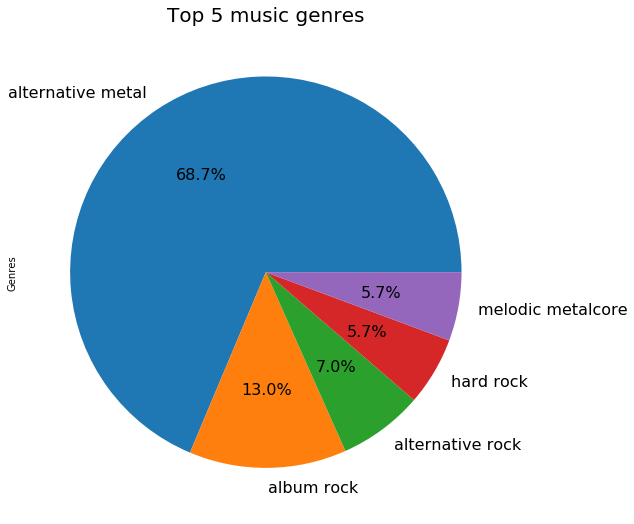

In [5]:
# First of all, we should have a look at the genres distribution of the playlist

 
plt.title('Top 5 music genres' ,  fontsize=20)
df['Genres'].value_counts()[0:5].plot(kind = 'pie' , figsize =(9,9) , autopct='%1.1f%%' , textprops={'fontsize': 16})



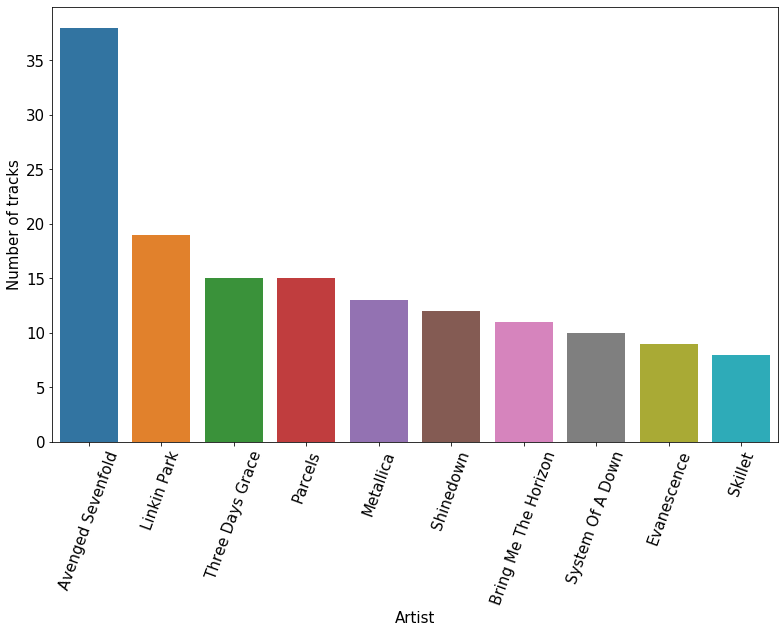

In [6]:
# Barplot representing the top artists in the playlist 


artist_dict = {'Artist':df['Artist Name'].value_counts().index,
               'Number of tracks': df['Artist Name'].value_counts().values}


artist_df = pd.DataFrame(artist_dict)[0:10]

plt.figure(figsize = (13,8))
artist_bar = sns.barplot(x = 'Artist' , y = 'Number of tracks' , data = artist_df)
plt.xticks(rotation=70 , size = 15)
plt.yticks(size = 15)
plt.xlabel('Artist' , size = 15)
plt.ylabel('Number of tracks' , size = 15)


from matplotlib import rcParams

rcParams['figure.figsize'] = 15,15



### Based on the plot above, it would make sense that music from these artists have definitely a higher chance to be added to my playlist, since they are my favourite ones

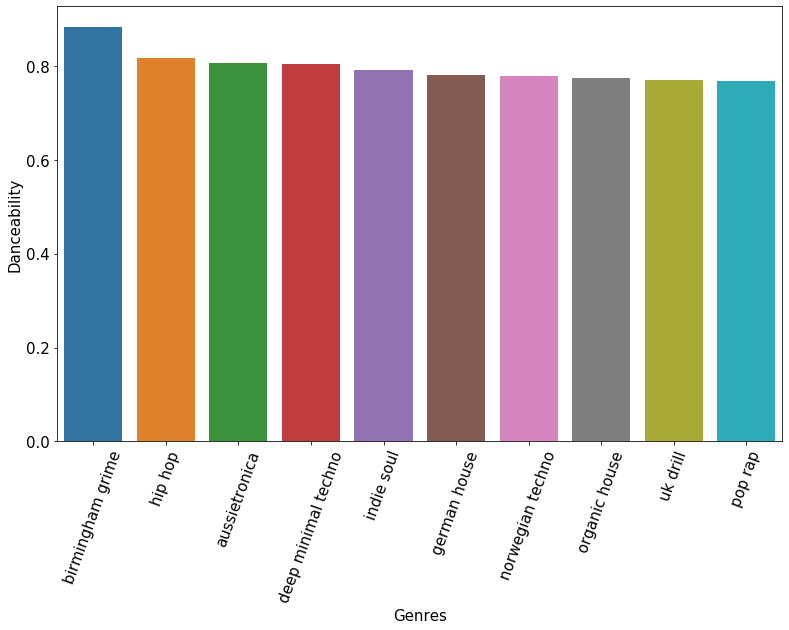

In [7]:
genres_danceability = {'Genres': df.groupby(by = ['Genres'])['Danceability'].mean().index ,
  'Danceability': df.groupby(by = ['Genres'])['Danceability'].mean().values}

genres_danceability_df = pd.DataFrame(genres_danceability).sort_values(by = ['Danceability'] , ascending = False)

plt.figure(figsize = (13,8))
chart = sns.barplot(x = 'Genres' , y = 'Danceability' , data = genres_danceability_df[0:10])
plt.xticks(rotation=70 , size = 15)
plt.yticks(size = 15)
plt.xlabel('Genres' , size = 15)
plt.ylabel('Danceability' , size = 15)
rcParams['figure.figsize'] = 15,15



### Based on the graph above, it is obvious that danceability is more common in songs that i do not have a lot of songs from, since the top 10 genres with the highest danceability are all outside my top 10 genres 
### The next step is to perform a similar analysis on other features


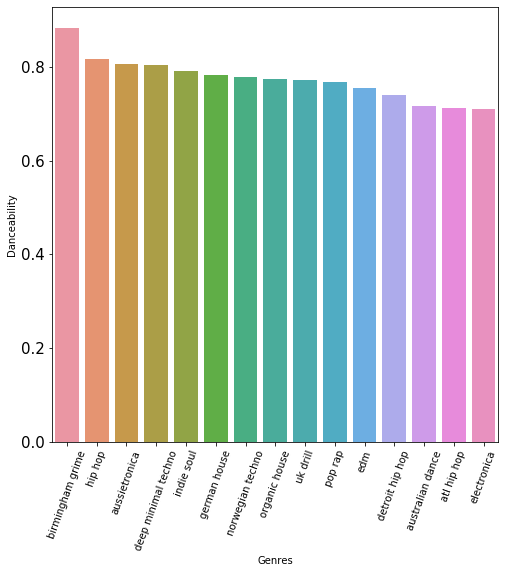

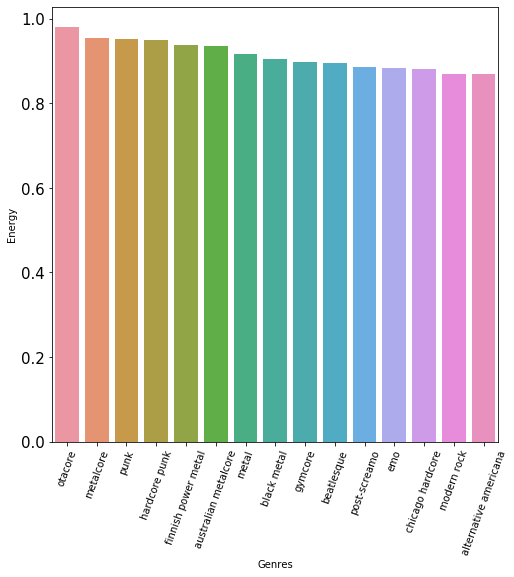

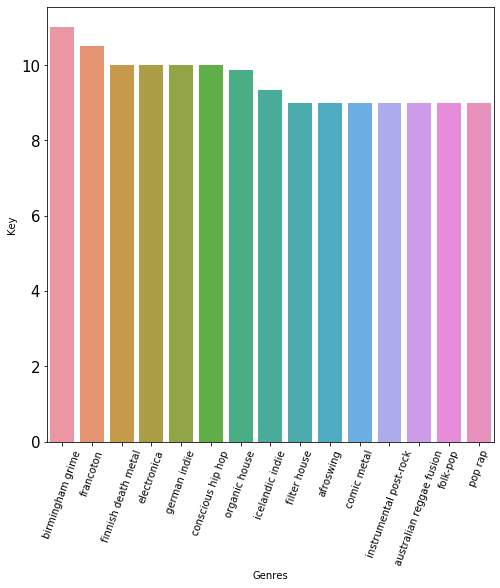

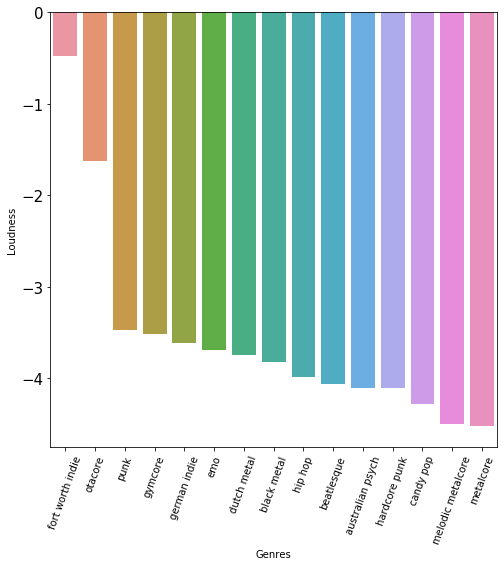

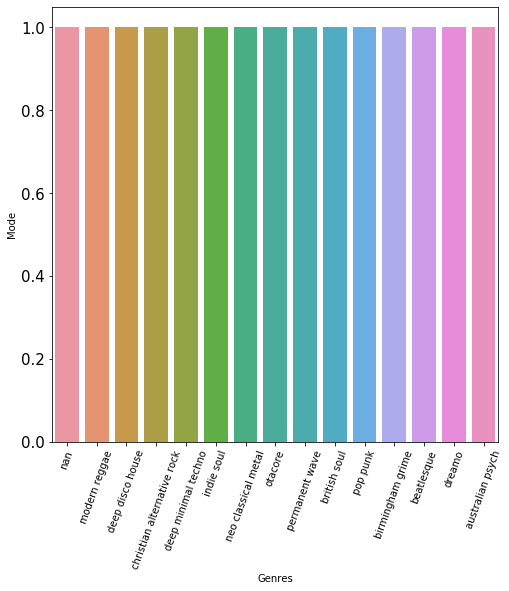

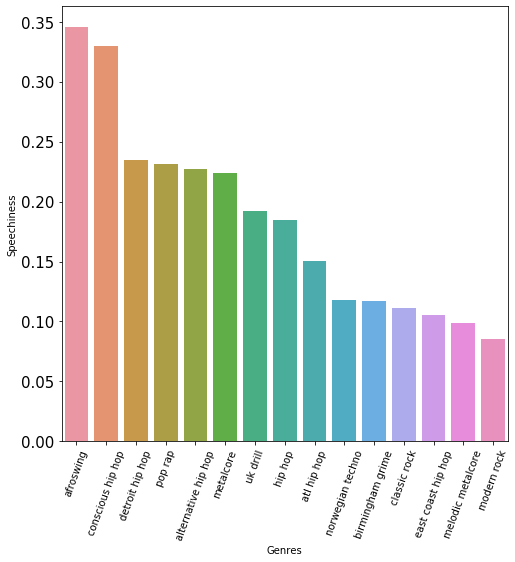

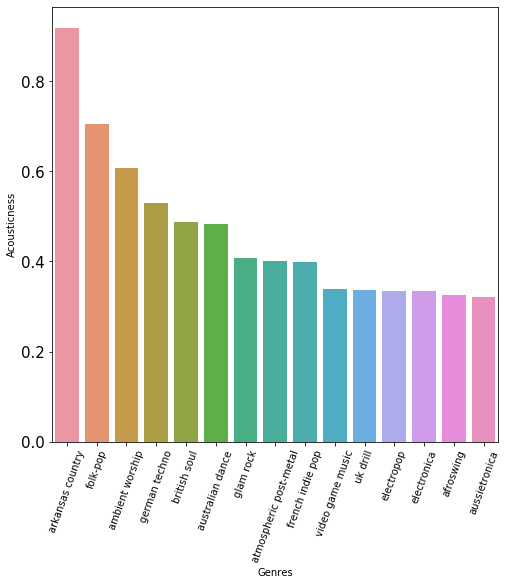

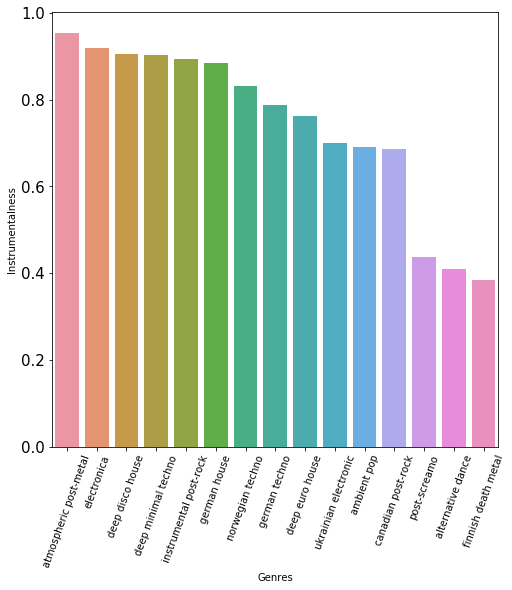

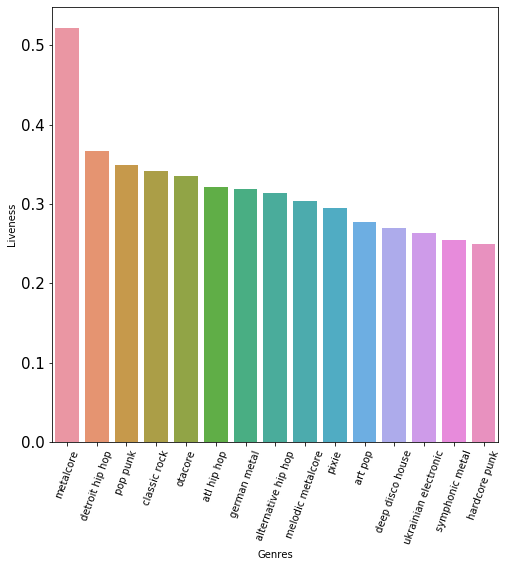

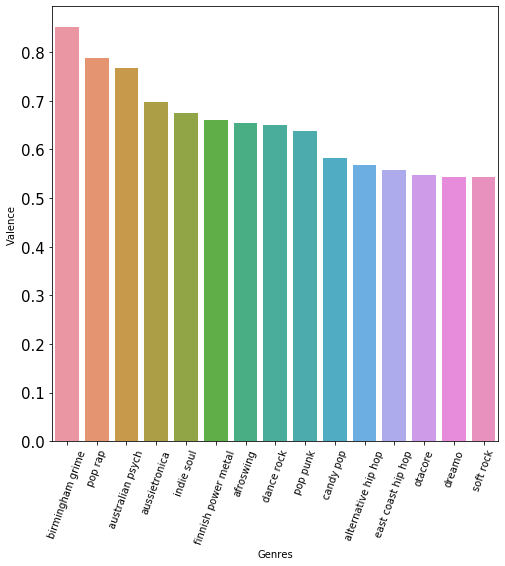

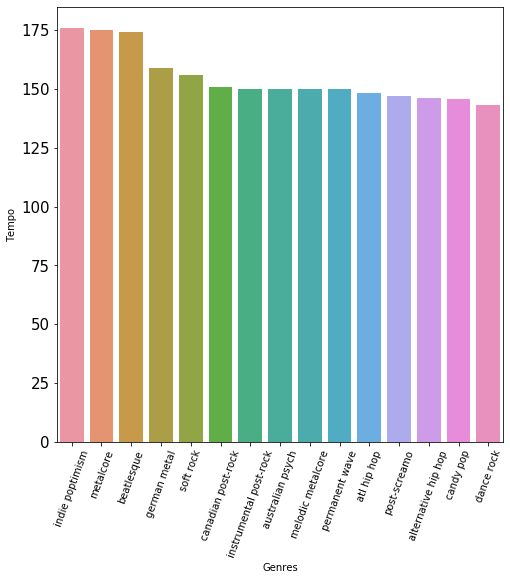

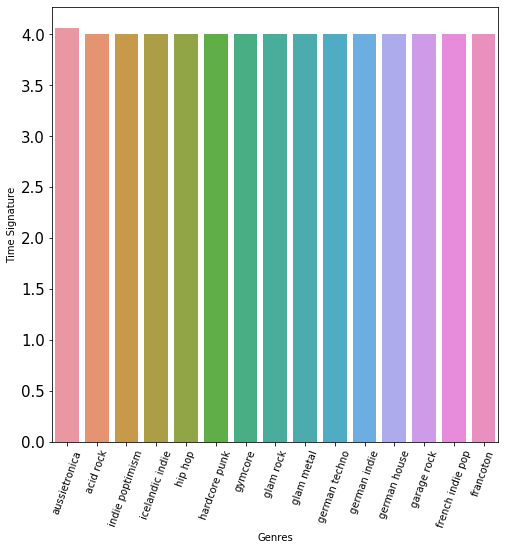

In [8]:
# Visually interpreting the multiple musical features 



music_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time Signature']

for i in music_features:
    
    
    plt.figure(figsize = (8,8))
    genres_grouped = {'Genres':df.groupby(by = ['Genres'])[i].mean().index,
                     str(i): df.groupby(by = ['Genres'])[i].mean().values}
    genres_grouped_df = pd.DataFrame(genres_grouped).sort_values(by = [str(i)] , ascending = False)
    chart = sns.barplot(x = 'Genres' , y = str(i) , data = genres_grouped_df[0:15])
    plt.xticks(rotation=70 , size = 10)
    plt.yticks(size = 15)
    plt.xlabel('Genres' , size = 10)
    plt.ylabel(str(i) , size = 10)
    plt.show()
    






### Notes from the created bar graphs:

### 1) My favourite types of music (rock/metal and this kind of style) are the highest in terms of energy, loudness, instrumentalism, liveness, and tempo

### 2) The next step is to import a playlist that is not mine (where the values of the last column will all be 0), and compare the musical features with this playlist in order to procees into feature selection


In [9]:
friend_df = pd.read_excel('/Users/anthonymoubarak/Desktop/Spotify Project/philip.xlsx')


friend_df['In_Playlist'] = 0
friend_df['Artist Genres'] = friend_df['Artist Genres'].astype('str')

friend_df['Album Release Date'] = friend_df['Album Release Date'].astype('str')

In [10]:
friend_df = friend_df.rename(columns = {'Artist Genres':'Genres'})

In [11]:
# Data cleaning 



friend_df['Genres'] = friend_df['Genres'].astype('str')

# Keep only the year and convert it to int
for i in np.arange(len(friend_df['Album Release Date'])):
    
    friend_df['Album Release Date'][i] = friend_df['Album Release Date'][i].split('-')[0]
    

#friend_df['Album Release Date'] = friend_df['Album Release Date'].astype('int')


# Convert Explicit column to binary 

#friend_df['Explicit'] = friend_df['Explicit'].astype('int') 

# Convert the artist genres column to a list of words/genres

for i in np.arange(len(friend_df['Genres'])):
    
    friend_df['Genres'][i] = friend_df['Genres'][i].split(',')


    
# Considering that the df's timeframe is less than 2 years and that my taste of music has not shifted that much
# (i am still a fan of the same main genres like rock/metal), i decided to drop the Added at column
# The album name column should also be dropped, since the majority of songs are the only song from a ceirtan album


/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# Since the genres column has lists, it is an extra challenge to decode this variable ,
# which is why i chose to keep the first word/entry of each list, since it is most likely
# to be indicative of the genre

for i in np.arange(len(friend_df['Genres'].index)):
    friend_df['Genres'][i] = friend_df['Genres'][i][0]

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Next, add this playlist to your playlist in order to perform later analysis
friend_df = friend_df.drop(columns = ['Disc Number', 'Track Number',
                                     'Unnamed: 7' , 'Copyrights' , 'Album Name',
                                      'Time Signature', 'Album Genres', 'Label'])

df = df.drop(columns = ['Time Signature'])

new_df = pd.concat([df , friend_df] , axis = 0 , ignore_index= True)


In [14]:
friend_df

,Track Name,Artist Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,In_Playlist
0,Jet Black Heart,5 Seconds of Summer,2015,221715.0,0.0,59.0,boy band,0.507,0.850,11.0,-4.274,0.0,0.0330,0.000163,0.000000,0.0812,0.545,153.957,0
1,My First Kiss (feat. Ke$ha),"3OH!3, Kesha",2010,192440.0,0.0,62.0,dance pop,0.682,0.889,0.0,-4.166,1.0,0.0804,0.005640,0.000000,0.3600,0.827,138.021,0
2,OMG,"Usher, will.i.am",2010,269493.0,0.0,0.0,atl hip hop,0.781,0.745,4.0,-5.810,0.0,0.0332,0.198000,0.000011,0.3600,0.326,129.998,0
3,Dirty Little Secret,The All-American Rejects,2005,193653.0,0.0,69.0,modern rock,0.465,0.954,10.0,-4.251,1.0,0.0440,0.000346,0.000005,0.5730,0.458,143.850,0
4,"All I Do Is Win (feat. T-Pain, Ludacris, Snoop...","DJ Khaled, T-Pain, Ludacris, Snoop Dogg, Rick ...",2010,227293.0,0.0,0.0,dance pop,0.543,0.774,10.0,-3.577,1.0,0.1180,0.009900,0.000000,0.4220,0.289,149.975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)","DJ Snake, Selena Gomez, Ozuna, Cardi B",2019,212500.0,1.0,69.0,dance pop,0.842,0.801,8.0,-4.167,0.0,0.2280,0.157000,0.000005,0.0642,0.617,95.881,0
294,Summer Of '69,Bryan Adams,2020,213651.0,0.0,34.0,album rock,0.450,0.888,2.0,-3.873,1.0,0.0443,0.008990,0.000000,0.0908,0.694,138.755,0
295,Back To You,Selena Gomez,2018,210240.0,0.0,69.0,dance pop,0.600,0.683,6.0,-6.271,1.0,0.0493,0.098400,0.000001,0.1100,0.494,102.036,0
296,no tears left to cry,Ariana Grande,2018,205920.0,0.0,78.0,dance pop,0.699,0.713,9.0,-5.507,0.0,0.0594,0.040000,0.000003,0.2940,0.354,121.993,0


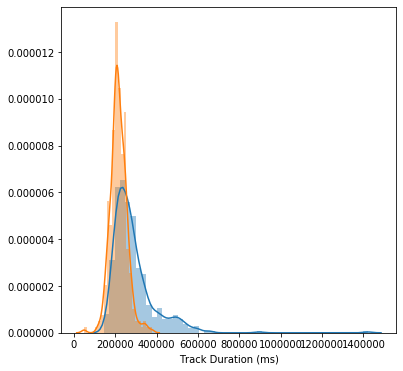

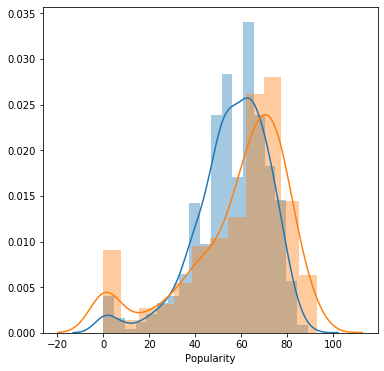

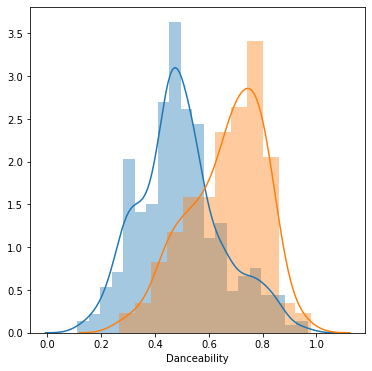

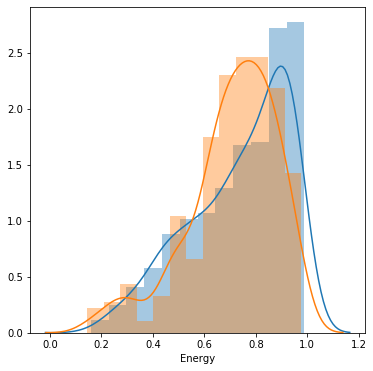

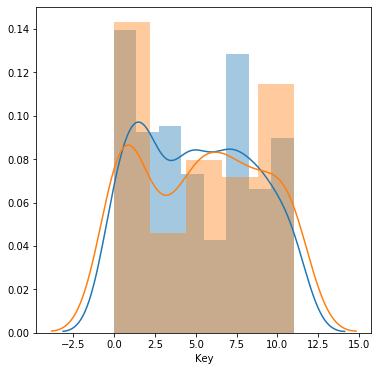

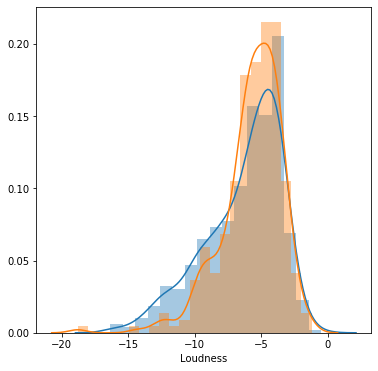

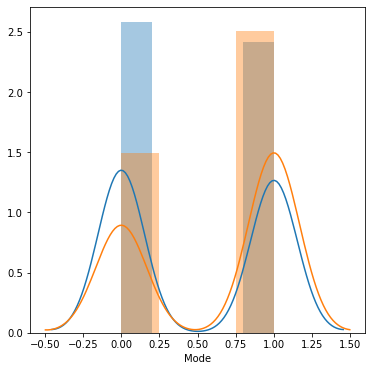

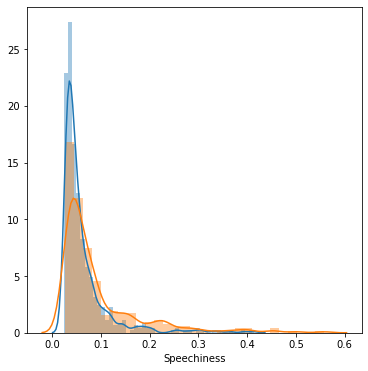

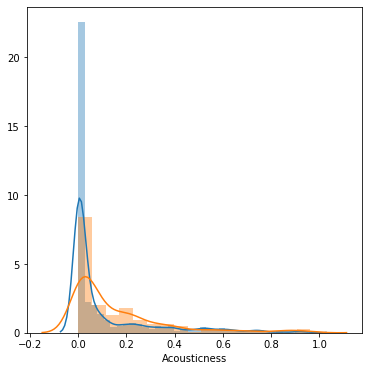

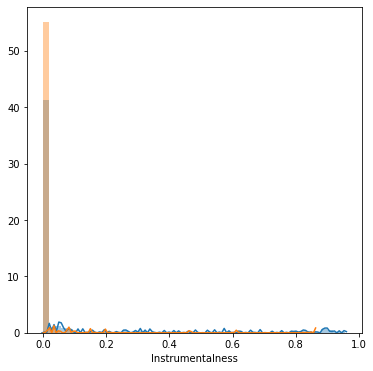

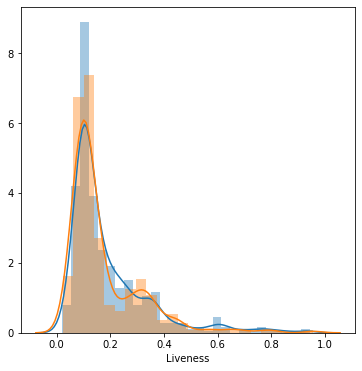

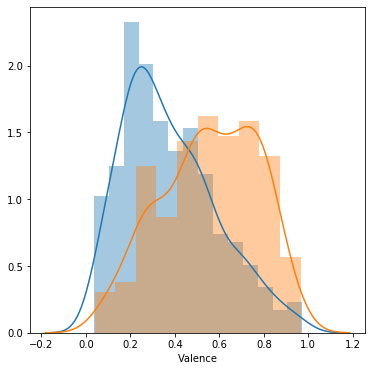

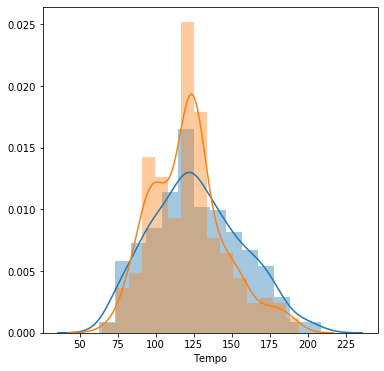

In [15]:
friend_df = friend_df.dropna()
#fig, axs = plt.subplots(figsize=(24, 8), nrows=3, ncols=4)



musical_features = ['Track Duration (ms)' , 'Popularity', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

for i in musical_features:
    plt.figure(figsize = (6,6))
    dist_chart = sns.distplot(df[str(i)])
    dist_chart = sns.distplot(friend_df[str(i)])
    plt.show()
 

## Notes from distribution graphs:
### 1) The largest differences come from the danceability and valence of a song, where my playlist has 
### lower means in both values, which makes sense since rock music is not known to be "dance friendly"
### and lower valences indicate darker/sader songs, something which is reflective of the true nature of both 
### playlists.
### 2) The remaining features are also logical but are close to each other, so they might not end up having a significant effect when we reach the step of feature selection.

# Feature selection

In [16]:
# Create arrays that store all artist names and number of songs per artist 

Artist_Name = []
Total_Songs = []

for i in new_df['Artist Name'].value_counts().index:
    Artist_Name.append(i)
    
for j in new_df['Artist Name'].value_counts().values:
    Total_Songs.append(j)


artist_songs = {'Artist Name': Artist_Name , 'Total Songs': Total_Songs}
artist_songs_df = pd.DataFrame(artist_songs)


# Assign each value in our new df to its corresponding numerical value

new_list = []
for i in new_df['Artist Name']:
   
    new_list.append(artist_songs_df[artist_songs_df['Artist Name'] == i]['Total Songs'].to_string(index = False))
    

new_list_clean = []
for i in new_list:
    
    if i != 'Series([], )':
        
        new_list_clean.append(i)
        


new_df['Artist Name'] = new_df['Artist Name'].fillna(0)
new_df = new_df[new_df['Artist Name'] != 0]

new_df['Artist Name'] = new_list_clean

new_df['Artist Name'] = new_df['Artist Name'].astype('int')

new_df['Genres'].value_counts()

alternative metal      206
dance pop              108
album rock              43
alternative rock        23
modern rock             19
                      ... 
hip house                1
neo classical metal      1
black metal              1
birmingham grime         1
g funk                   1
Name: Genres, Length: 159, dtype: int64

In [17]:
# Do the same procedure as before but for the category of Genres

# Create arrays that store all artist names and number of songs per artist 

Genres = []
Total_Songs = []

for i in new_df['Genres'].value_counts().index:
    Genres.append(i)
    
for j in new_df['Genres'].value_counts().values:
    Total_Songs.append(j)


genres_songs = {'Genres': Genres , 'Total Songs': Total_Songs}
genres_songs_df = pd.DataFrame(genres_songs)


# Assign each value in our new df to its corresponding numerical value

new_list = []
for i in new_df['Genres']:
   
    new_list.append(genres_songs_df[genres_songs_df['Genres'] == i]['Total Songs'].to_string(index = False))
    

new_list_clean = []
for i in new_list:
    
    if i != 'Series([], )':
        
        new_list_clean.append(i)
        

new_df['Genres'] = new_df['Genres'].fillna(0)
new_df = new_df[new_df['Genres'] != 0]

new_df['Genres'] = new_list_clean

new_df['Genres'] = new_df['Genres'].astype('int')

new_df

,Track Name,Artist Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,In_Playlist
0,The Diary of Jane - Single Version,5,2006,200546.0,0.0,62.0,206,0.392,0.965,10.0,-4.441,0.0,0.0630,0.000070,0.042700,0.1060,0.298,167.094,1
1,Nothing Else Matters,13,1991,388266.0,0.0,78.0,17,0.553,0.362,4.0,-11.218,0.0,0.0263,0.045800,0.000006,0.0750,0.158,142.352,1
2,The Unforgiven,13,1991,386493.0,0.0,72.0,17,0.540,0.584,7.0,-9.579,1.0,0.0254,0.010800,0.002960,0.2530,0.244,139.261,1
3,Turn The Page,13,1998,366466.0,0.0,62.0,17,0.426,0.813,8.0,-3.963,1.0,0.0318,0.000019,0.022000,0.0937,0.228,149.013,1
4,The Day That Never Comes,13,2008,476266.0,0.0,61.0,17,0.334,0.982,4.0,-2.293,0.0,0.0619,0.000091,0.149000,0.1060,0.501,126.883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,"Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)",1,2019,212500.0,1.0,69.0,108,0.842,0.801,8.0,-4.167,0.0,0.2280,0.157000,0.000005,0.0642,0.617,95.881,0
821,Summer Of '69,1,2020,213651.0,0.0,34.0,43,0.450,0.888,2.0,-3.873,1.0,0.0443,0.008990,0.000000,0.0908,0.694,138.755,0
822,Back To You,1,2018,210240.0,0.0,69.0,108,0.600,0.683,6.0,-6.271,1.0,0.0493,0.098400,0.000001,0.1100,0.494,102.036,0
823,no tears left to cry,1,2018,205920.0,0.0,78.0,108,0.699,0.713,9.0,-5.507,0.0,0.0594,0.040000,0.000003,0.2940,0.354,121.993,0


In [18]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split 

#Drop the Explicit column

new_df = new_df.drop(columns = ['Explicit'])

In [19]:
# It is better to apply feature selection methods on the training dataset (and not the whole df)

X = new_df.drop('In_Playlist' , axis = 1)
y = new_df['In_Playlist']


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)

In [20]:
# Finalize Data cleaning
X_train = X_train.drop(columns = ['Track Name'])
X_test = X_test.drop(columns = ['Track Name'])
X_train['Loudness'] = abs(X_train['Loudness'])
X_test['Loudness'] = abs(X_test['Loudness'])


In [21]:
# Standardize/Normalize our training and testing sets 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
# Feature Selection: F-test and p-test 


from sklearn.feature_selection import f_classif

sel = f_classif(X_train , y_train)


p_values = pd.Series(sel[1])

# Select p values < 0.05 to see which variables are the most important 

p_values = p_values[p_values < 0.05]

# Use these p values to extract the most important features

features = X_train.columns[p_values.index]


# Filter the new training and testing sets 


X_train = X_train[features]
X_test = X_test[features]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
features

Index(['Artist Name', 'Album Release Date', 'Track Duration (ms)', 'Genres',
       'Danceability', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Valence', 'Tempo'],
      dtype='object')

# Model Building

In [24]:
# This problem is a classification problem, so i will fit 4 models, select the one with the lowest MSE, and
# optimize the hyperparameters of the model 

## Model 1: Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression



# Instantiate model with its deafault parameters

lr = LogisticRegression()

# Fit the the training data

lr.fit(X_train_scaled , y_train)


lr_predictions = lr.predict(X_test_scaled)


# Compute classification accuracy for the logistic regression model
from sklearn import metrics

lr_accuracy = metrics.accuracy_score(y_test, lr_predictions)
print(lr_accuracy)

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8895705521472392


## Model 2: KNN 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, knn_predictions))

0.8282208588957055


In [27]:
# Plot the accuracy for different values of k

k_accuracy = []

for k in range(1 , 30):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled , y_train)
    knn_predictions = knn.predict(X_test_scaled)
    k_accuracy.append(metrics.accuracy_score(y_test, knn_predictions))

Text(0.5, 1.0, 'Model Accuracy For Several Values Of K')

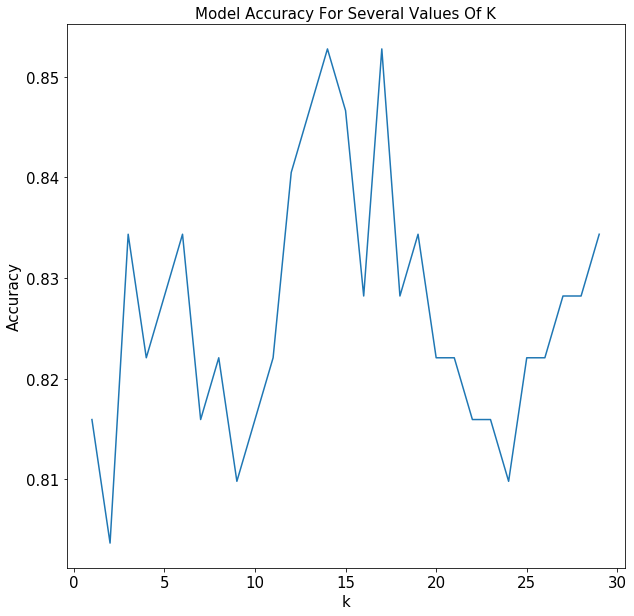

In [28]:
x = np.arange(1,30)

plt.figure(figsize = (10,10))
plt.plot(x , k_accuracy)
plt.xlabel('k' , size = 15)
plt.ylabel('Accuracy' , size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Model Accuracy For Several Values Of K' , size = 15)

In [29]:
# Select the best accuracy
knn_best_accuracy = max(k_accuracy)
knn_best_accuracy

0.852760736196319

## Model 3: Support Vector Machine

In [30]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm1.fit(X_train_scaled, y_train)

#Predict the response for test dataset
svm_predictions = svm1.predict(X_test_scaled)

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct ?

svm_accuracy = metrics.accuracy_score(y_test, svm_predictions) 

print("Accuracy:", svm_accuracy)

Accuracy: 0.8834355828220859


# Model 4: Decision Tree Classifier

In [32]:
from sklearn import tree 

decision_tree = tree.DecisionTreeClassifier()

decision_tree.fit(X_train_scaled , y_train)

decision_tree_predictions = decision_tree.predict(X_test_scaled)

decision_tree_error = metrics.accuracy_score(y_test , decision_tree_predictions )

decision_tree_error

0.7791411042944786

# Model Selection and HyperParameter Optimization

In [33]:
# Define a list of classifiers in order to compare the performance of each model

classifiers = ['Logistic Regression' , 'KNN' , 'Support Vector Machine' , 'Decision Tree']
accuracy = [lr_accuracy , knn_best_accuracy, svm_accuracy, decision_tree_error ]

classification_accuracy_dict = {'Classifier': classifiers , 'Accuracy': accuracy }

classification_accuracy = pd.DataFrame(classification_accuracy_dict)

classification_accuracy['Accuracy'] = classification_accuracy['Accuracy']*100

classification_accuracy = classification_accuracy.rename(columns = {'Accuracy' : 'Accuracy (%)'})

classification_accuracy = classification_accuracy.sort_values('Accuracy (%)' , ascending = False)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

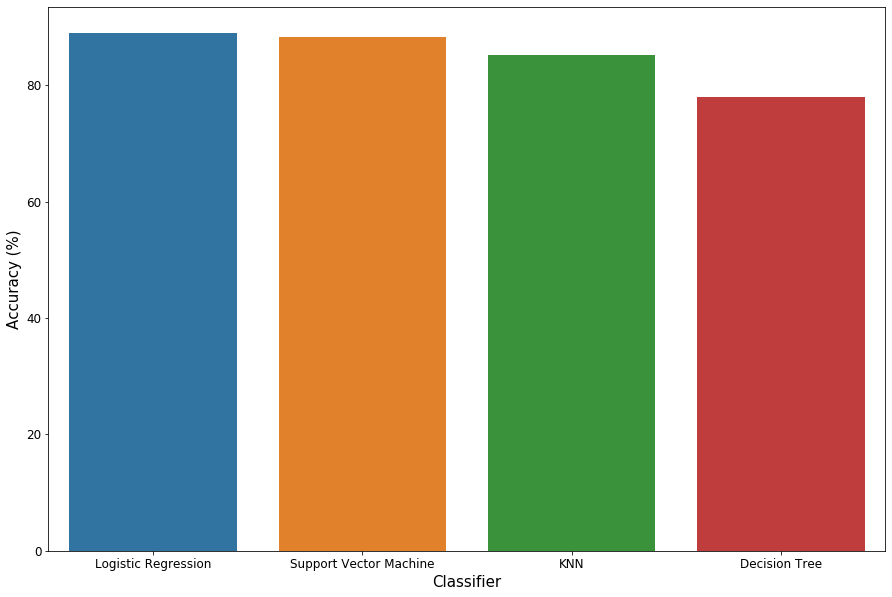

In [34]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Classifier' , y = 'Accuracy (%)' , data = classification_accuracy)
plt.xlabel('Classifier' , size = 15)
plt.ylabel('Accuracy (%)' , size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)


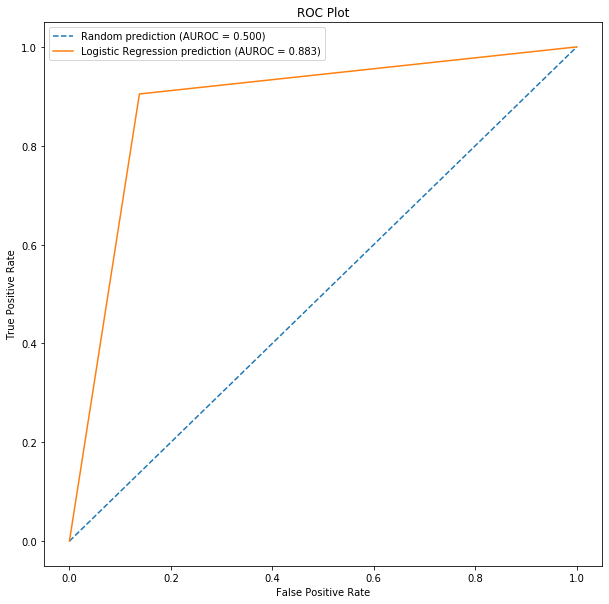

In [35]:
# The 2 bets models (in terms of accuracy) as Logistic Regression and Support Vectors Machine.
# These are the 2 models selected for hyperparameter optimization

# ROC Curve Logistic Regression
 
from sklearn.metrics import roc_curve, roc_auc_score

r_probs = [0 for _ in range(len(y_test))]

r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_predictions)
svm_auc = roc_auc_score(y_test, svm_predictions)


r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predictions)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)

plt.figure(figsize = (10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression prediction (AUROC = %0.3f)' % lr_auc)
#plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM  prediction (AUROC = %0.3f)' % svm_auc)




# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [36]:
# HyperParameter Optimization



param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs= None)

In [39]:
best_clf = clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Con

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    3.9s f

In [40]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr2 = LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr2.fit(X_train_scaled , y_train)

lr2_predictions = lr2.predict(X_test_scaled)


lr_accuracy2 = metrics.accuracy_score(y_test, lr2_predictions)

print(lr_accuracy2)

0.8834355828220859


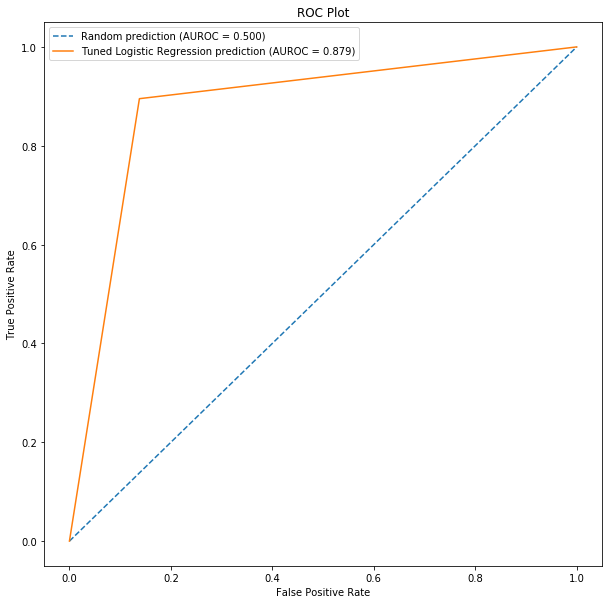

In [43]:
lr2_auc = roc_auc_score(y_test, lr2_predictions)



lr2_fpr, lr2_tpr, _ = roc_curve(y_test, lr2_predictions)


plt.figure(figsize = (10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr2_fpr, lr2_tpr, linestyle='-', label='Tuned Logistic Regression prediction (AUROC = %0.3f)' % lr2_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [44]:
# SVM Optimization

param_grid_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [45]:
grid = GridSearchCV(svm1,param_grid_svm,refit=True,verbose=2)
grid.fit(X_train_scaled,y_train)

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ..........

[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [46]:
print(grid.best_estimator_)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [47]:
svm2 = svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
svm2.fit(X_train_scaled,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
svm2_predictions = svm2.predict(X_test_scaled)

In [50]:
svm_accuracy2 = metrics.accuracy_score(y_test, svm2_predictions)

In [51]:
svm_accuracy2

0.8282208588957055

# Results and Final Model

In [52]:
final_results_dict = {'Models': ['LR' , 'Tuned LR', 'SVM', 'Tuned SVM'] , 
                 'Accuracy':[lr_accuracy , lr_accuracy2 , svm_accuracy, svm_accuracy2] }  


final_results = pd.DataFrame(final_results_dict)

In [53]:
final_results['Accuracy (%)'] = np.round(final_results['Accuracy']*100 , 2)

final_results.drop(columns = ['Accuracy']) 

,Models,Accuracy (%)
0,LR,88.96
1,Tuned LR,88.34
2,SVM,88.34
3,Tuned SVM,82.82


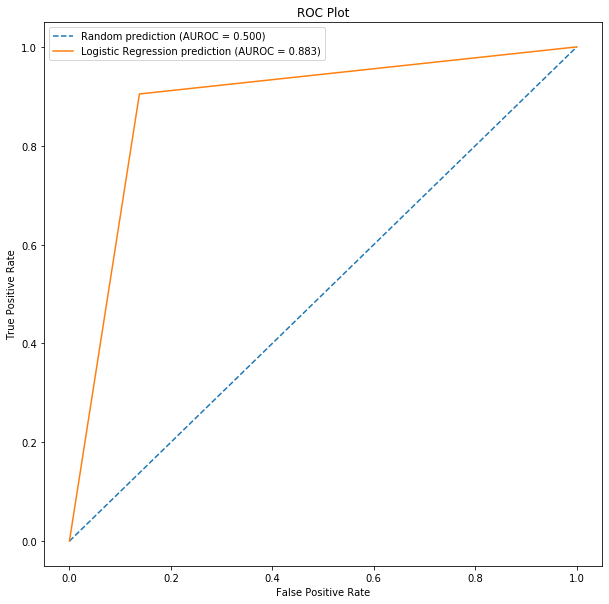

In [54]:
# ROC Curve LR model 


plt.figure(figsize = (10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression prediction (AUROC = %0.3f)' % lr_auc)
#plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM  prediction (AUROC = %0.3f)' % svm_auc)




# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

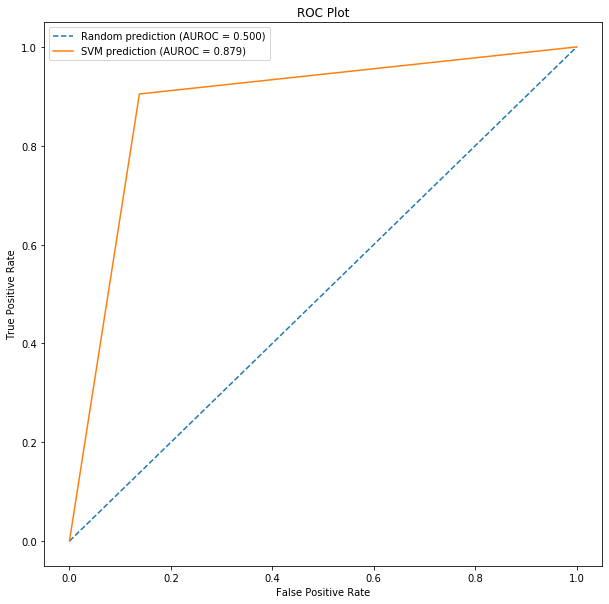

In [55]:
# ROC curve SVM


plt.figure(figsize = (10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='SVM prediction (AUROC = %0.3f)' % svm_auc)
#plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM  prediction (AUROC = %0.3f)' % svm_auc)




# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## After comparing the accuracy and ROC curves of the standard SVM and LR models, i concluded that standard logistic regression is the best model for this problem.

# Test on new data

In [84]:
test_data = pd.read_csv('/Users/anthonymoubarak/Desktop/Spotify Project/test_algorithm.csv')
useless_columns = ['Track URI' , 'Artist URI' , 'Album URI' , 'Album Image URL' , 'Disc Number' , 'Track Number',
                  'Track Preview URL','Added By']

test_data = test_data.drop(columns = useless_columns)

# Data cleaning 



test_data['Artist Genres'] = test_data['Artist Genres'].astype('str')

# Keep only the year and convert it to int
for i in np.arange(len(test_data['Album Release Date'])):
    
    test_data['Album Release Date'][i] = test_data['Album Release Date'][i].split('-')[0]
    

test_data['Album Release Date'] = test_data['Album Release Date'].astype('int')


# Convert Explicit column to binary 

test_data['Explicit'] = test_data['Explicit'].astype('int') 

# Convert the artist genres column to a list of words/genres

for i in np.arange(len(test_data['Artist Genres'])):
    
    test_data['Artist Genres'][i] = test_data['Artist Genres'][i].split(',')


    
# Considering that the df's timeframe is less than 2 years and that my taste of music has not shifted that much
# (i am still a fan of the same main genres like rock/metal), i decided to drop the Added at column
# The album name column should also be dropped, since the majority of songs are the only song from a ceirtan album


test_data = test_data.rename(columns= {'Artist Genres' : 'Genres'})
test_data = test_data.drop(columns = ['Added At' , 'Album Name'])

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
# Create arrays that store all artist names and number of songs per artist 

Artist_Name = []
Total_Songs = []

for i in test_data['Artist Name'].value_counts().index:
    Artist_Name.append(i)
    
for j in test_data['Artist Name'].value_counts().values:
    Total_Songs.append(j)


artist_songs = {'Artist Name': Artist_Name , 'Total Songs': Total_Songs}
artist_songs_df = pd.DataFrame(artist_songs)


# Assign each value in our new df to its corresponding numerical value

new_list = []
for i in test_data['Artist Name']:
   
    new_list.append(artist_songs_df[artist_songs_df['Artist Name'] == i]['Total Songs'].to_string(index = False))
    

new_list_clean = []
for i in new_list:
    
    if i != 'Series([], )':
        
        new_list_clean.append(i)
        


test_data['Artist Name'] = test_data['Artist Name'].fillna(0)
test_data = test_data[test_data['Artist Name'] != 0]

test_data['Artist Name'] = new_list_clean

test_data['Artist Name'] = test_data['Artist Name'].astype('int')

test_data['Genres'].value_counts()

[alternative metal, canadian rock, nu metal, post-grunge]                                         2
[celtic rock, dance pop, neo mellow, pop, pop rock, post-teen pop, viral pop]                     1
[alternative metal, funk metal, nu metal, rap metal, rock]                                        1
[electro, filter house]                                                                           1
[alternative metal, nu metal, post-grunge]                                                        1
[alternative metal, double drumming, nu metal, rap metal]                                         1
[alternative metal, christian alternative rock, christian music, christian rock]                  1
[glam metal, rock]                                                                                1
[alternative metal, alternative rock, nu metal, permanent wave, post-grunge, rock, supergroup]    1
[alternative metal, nu metal, rap metal]                                                          1


In [86]:
# Do the same procedure as before but for the category of Genres

# Create arrays that store all artist names and number of songs per artist 

Genres = []
Total_Songs = []

for i in test_data['Genres'].value_counts().index:
    Genres.append(i)
    
for j in test_data['Genres'].value_counts().values:
    Total_Songs.append(j)


genres_songs = {'Genres': Genres , 'Total Songs': Total_Songs}
genres_songs_df = pd.DataFrame(genres_songs)


# Assign each value in our new df to its corresponding numerical value

new_list = []
for i in test_data['Genres']:
   
    new_list.append(genres_songs_df[genres_songs_df['Genres'] == i]['Total Songs'].to_string(index = False))
    

new_list_clean = []
for i in new_list:
    
    if i != 'Series([], )':
        
        new_list_clean.append(i)
        

test_data['Genres'] = test_data['Genres'].fillna(0)
test_data = test_data[test_data['Genres'] != 0]

test_data['Genres'] = test_data

#test_data['Genres'] = test_data['Genres'].astype('int')

genres_songs_df

ValueError: Lengths must match to compare

In [87]:
test_data 

,Track Name,Artist Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,Life Is Beautiful 2017,1,2017,270001,0,49,"[alternative metal, nu metal, post-grunge]",0.377,0.450,5,-10.028,1,0.0446,0.008390,0.000221,0.0905,0.1070,157.719,4
1,'Til We Die,1,2008,345693,0,51,"[alternative metal, double drumming, nu metal,...",0.482,0.751,4,-4.993,1,0.0467,0.137000,0.000000,0.1620,0.5210,148.048,3
2,Faint,1,2003,162600,0,70,"[alternative metal, nu metal, post-grunge, rap...",0.554,0.978,4,-3.554,1,0.1310,0.111000,0.000000,0.0731,0.5940,135.095,4
3,"Another Brick in the Wall, Pt. 1, 2, 3",1,2004,427973,0,56,"[alternative metal, funk metal, nu metal, rap ...",0.620,0.496,0,-8.795,1,0.0277,0.001370,0.135000,0.0993,0.0901,102.997,4
4,Be Yourself,1,2005,278973,0,70,"[alternative metal, alternative rock, nu metal...",0.423,0.845,11,-3.509,0,0.0559,0.143000,0.000005,0.2130,0.3170,116.602,4
5,Down with the Sickness,1,2010,278706,1,66,"[alternative metal, nu metal, rap metal]",0.649,0.896,10,-2.704,0,0.0560,0.000319,0.000012,0.1020,0.9240,90.009,4
6,Wanted Dead Or Alive,1,1986,308666,0,74,"[glam metal, rock]",0.252,0.802,7,-3.976,1,0.0391,0.130000,0.014600,0.3090,0.2530,150.056,4
7,Someday,2,2003,207466,0,70,"[alternative metal, canadian rock, nu metal, p...",0.455,0.858,11,-5.659,0,0.0391,0.000616,0.000247,0.2260,0.5970,163.118,4
8,I'd Come for You,2,2008,262626,0,59,"[alternative metal, canadian rock, nu metal, p...",0.489,0.748,2,-5.488,1,0.0311,0.033000,0.000000,0.1440,0.3850,147.998,4
9,Young And Beautiful,1,2013,236053,0,79,"[art pop, dance pop, pop]",0.324,0.416,11,-8.920,0,0.0368,0.262000,0.000037,0.1100,0.1510,113.986,4
